# **Question: 1**  **[8 marks]**


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 - 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. [1.5 Marks] Plot the function for $$-2.5 \le x \le 1.5$$

b. [2 Marks] What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.2$.

c. [1.5 Marks] Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. [1.5 Marks] Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. [1.5 Marks] Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

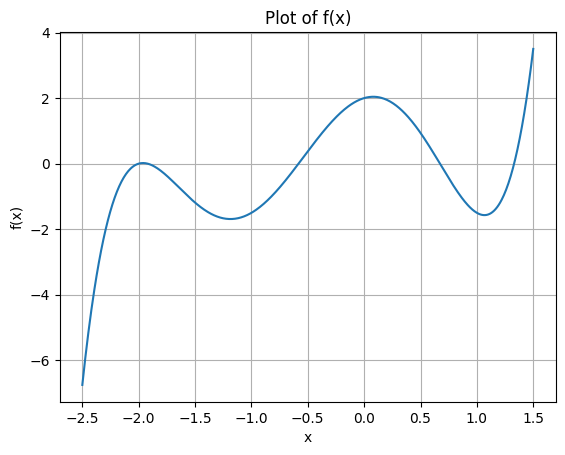

In [ ]:
#A
def f(x):
    return x**5 + 2.5*x**4 - 2*x**3 - 6*x**2 + x + 2

def fp(x):
    return 5*x**4 + 10*x**3 - 6*x**2 - 12*x + 1

x1 = np.linspace(-2.5, 1.5, 600)
plt.plot(x1, f(x1))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x)")
plt.grid(True)
plt.show()

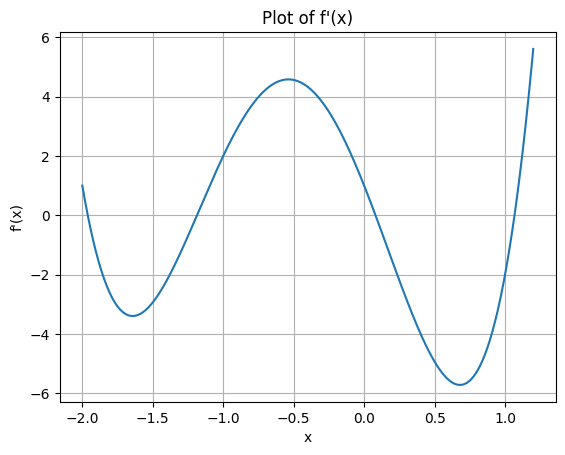

Actual slopes:
f'(0) = 1
f'(-1.18625) = -9.340808109215004e-06


In [ ]:
#B
x2 = np.linspace(-2, 1.2, 500)
plt.plot(x2, fp(x2))
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Plot of f'(x)")
plt.grid(True)
plt.show()


x_points = [0, -1.18625]
print("Actual slopes:")
for x0 in x_points:
    print(f"f'({x0}) = {fp(x0)}")


In [ ]:
#C, D, E

h = 0.2

def forward_diff(x, h):
    return (f(x+h) - f(x)) / h

def backward_diff(x, h):
    return (f(x) - f(x-h)) / h

def central_diff(x, h):
    return (f(x+h) - f(x-h)) / (2*h)


rows = []
for x0 in x_points:
    exact = fp(x0)
    fwd = forward_diff(x0, h)
    bwd = backward_diff(x0, h)
    cen = central_diff(x0, h)
    rows.append({
        "x": x0,
        "Exact": exact,
        "Forward": fwd,
        "Backward": bwd,
        "Central": cen,
        "Error(Forward)": abs(fwd-exact),
        "Error(Backward)": abs(bwd-exact),
        "Error(Central)": abs(cen-exact)
    })

df = pd.DataFrame(rows)
print("\nComparison Table:\n")
print(df)





Comparison Table:

         x     Exact   Forward  Backward   Central  Error(Forward)  \
0  0.00000  1.000000 -0.258400  2.101600  0.921600        1.258400   
1 -1.18625 -0.000009  1.089027 -1.069095  0.009966        1.089037   

   Error(Backward)  Error(Central)  
0         1.101600        0.078400  
1         1.069086        0.009976  


# **Question: 02**  **[6 marks]**
Your phone has been losing charge far faster this week than last. You open its hidden system log and find only these four lines that mention screen-on time and the resulting battery drop:

```
1.0 hour screen-on time → 17 % lost  
3.5 hour screen-on time → 50 % lost  
4.0 hour screen-on time → 85 % lost
```
Later, a single extra line is appended:
```
5.0 hour screen-on time → 90 % lost
```
The log viewer refuses to draw a graph and the official battery-health tool is locked behind a server that is currently down.

All you have is the raw numbers and a sticky note on your desk that says:
<br></br>
<b><i>“Three (or more) exact readings → one unique predictive curve.”</i></b>
<br></br>
You want to know how much battery you would lose if you binge-scroll for **2.2** hours straight tonight.

### **a)** [3 Marks] Print the newton's basis for the polynomial constructed with the first three data points.
### **b)** [3 Marks] Now, write a function that adds new data to the previous data.
**[You are not allowed to hard code]**

In [ ]:
def calc_div_diff_matrix(x, y):
  a = np.zeros(len(x), len(x)):
  a[0]=y
  for i in range (1, len(x)):
    for j in range (len(x)-1):
      a[1]






x = [1.0, 3.5, 4.0]
y = [17.0, 50.0, 85.0]

Matrix = calc_div_diff_matrix(x,y)
print(Matrix)


SyntaxError: invalid syntax (ipython-input-1043675822.py, line 2)

In [ ]:
def add_new_node(Matrix, new_x, new_y, x_existing):


new_x = 5.0
new_y = 99
Matrix_extended = add_new_node(Matrix, new_x, new_y, x)
print(Matrix_extended)

IndentationError: expected an indented block after function definition on line 1 (ipython-input-686668710.py, line 4)

## Question 3 **[4 + 2 marks]**


In Vandermonde matrix, the equation can be written as  $$\mathbf{Xa = y},$$
where in class we constructed, $\mathbf{X} = $

\begin{bmatrix}
x_0^0 & x_0^1 & \cdots & x_0^{n-1}  & x_0^n\\
x_1^0 & x_1^1 & \cdots & x_1^{n-1} & x_1^n\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n-1}^0 & x_{n-1}^1 & \cdots & x_{n-1}^{n-1}  & x_{n-1}^n\\
x_n^0 & x_{n}^1 & \cdots & x_n^{n-1} & x_n^n\\
\end{bmatrix}


**Now you have to implement the following matrix**

$\mathbf{X_{new}} = $
\begin{bmatrix}
x_n^n & x_{n}^{n-1} & \cdots & x_n^{1} & x_n^0\\
x_{n-1}^n & x_{n-1}^{n-1} & \cdots & x_{n-1}^{1} & x_{n-1}^{0}\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
x_1^n & x_1^{n-1} & \cdots & x_1^{1} & x_1^{0}\\
x_0^n & x_0^{n-1} & \cdots & x_0^{1} & x_0^{0}\\
\end{bmatrix}

Write a **function** that takes **data_x** as parameter and populates the **$X_{new}$** matrix. Use **(52,-90), (-30,-140), (-100,-3), (0,1), (38,10), (79,42)** data points. Print the matrix, **$X_{new}$** from the given data.


Next, take the **diagonal** elements of your Vandermonde matrix to be the coefficients of an n-degree Polynomial. Consider element with index [0,0] to be the **last coefficient** and with index [n,n] to be the **first coefficient**. Print the Polynomial.

Hint: Use the Polynomial class of Numpy

In [ ]:
def vander (data_x):
   a= np.zeros(len(data_x), len(data_x))
    for i in data_x:
      for j in range (len(data_x)):



IndentationError: unexpected indent (ipython-input-3760380518.py, line 3)